In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler as MMS

wine_data = pd.read_csv('./Data/winequality-red.csv', ';')

In [177]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [178]:
x_wine = wine_data.drop(columns = 'quality') 
y_wine = wine_data['quality']

In [179]:
x_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [180]:
y_wine

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [181]:
x_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


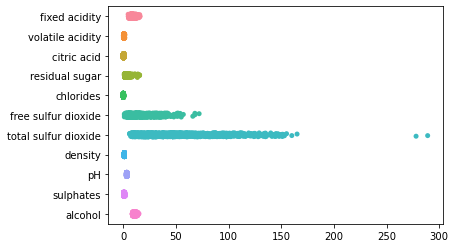

In [182]:
sns.stripplot(data = x_wine, orient = 'h')
plt.show()

In [183]:
x_wine.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

In [184]:
ss = SS()
x_wine_scaled = ss.fit_transform(x_wine)

In [185]:
type(x_wine_scaled)

numpy.ndarray

In [186]:
x_wine_scaled[0:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [187]:
x_wine_scaled_df = pd.DataFrame(x_wine_scaled)
x_wine_scaled_df.columns = x_wine.columns
x_wine_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


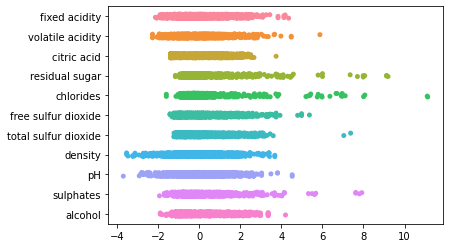

In [188]:
sns.stripplot(data = x_wine_scaled_df, orient = 'h')
plt.show()

In [189]:
x_wine_scaled_df['citric acid'].mean()

4.335354950443701e-16

In [190]:
x_wine_scaled_df['pH'].mean()

3.002879023890769e-15

In [191]:
x_wine_scaled_df.var()

fixed acidity           1.000626
volatile acidity        1.000626
citric acid             1.000626
residual sugar          1.000626
chlorides               1.000626
free sulfur dioxide     1.000626
total sulfur dioxide    1.000626
density                 1.000626
pH                      1.000626
sulphates               1.000626
alcohol                 1.000626
dtype: float64

In [192]:
pca = PCA()
pca_x_wine = pca.fit_transform(x_wine)

In [193]:
type(x_wine)

pandas.core.frame.DataFrame

In [194]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

In [195]:
pca.explained_variance_ratio_.size

11

In [196]:
pca.explained_variance_ratio_[0:1].sum()

0.9465769763954628

In [197]:
pca.explained_variance_ratio_[0:2].sum()

0.9949452809702793

In [198]:
pca.explained_variance_ratio_[0:5]

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04])

In [199]:
pca2 = PCA()
pca2_x_wine_scaled_df = pca2.fit_transform(x_wine_scaled_df)

In [200]:
pca2.explained_variance_ratio_.sum()

0.9999999999999999

In [201]:
pca2.explained_variance_ratio_.size

11

In [202]:
pca2.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [203]:
pca2.explained_variance_ratio_[0:8].sum()

0.946769673153768

In [204]:
pca2.explained_variance_ratio_[0:9].sum()

0.9781007746827458

In [205]:
pca2.explained_variance_ratio_[0:6]

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439])

In [268]:
f6_pca2_x_wine_scaled_df = pca2_x_wine_scaled_df[:,6]

In [269]:
f6_pca2_x_wine_scaled_df = f6_pca2_x_wine_scaled_df.reshape(-1, 1)

In [270]:
lin_reg_pc = LR()
lin_reg_pc.fit(f6_pca2_x_wine_scaled_df, y_wine)
lin_reg_pc.score(f6_pca2_x_wine_scaled_df, y_wine)

0.008122618729742515

In [209]:
y_pred_pc = lin_reg_pc.predict(f6_pca2_x_wine_scaled_df)

In [210]:
mean_squared_error(y_wine, y_pred_pc)

0.6464665374626907

In [211]:
f5_pca2_x_wine_scaled_df = pca2_x_wine_scaled_df[:,5]

In [212]:
f5_pca2_x_wine_scaled_df = f5_pca2_x_wine_scaled_df.reshape(-1, 1)

In [213]:
lin_reg_pcf5 = LR()
lin_reg_pcf5.fit(f5_pca2_x_wine_scaled_df, y_wine)
lin_reg_pcf5.score(f5_pca2_x_wine_scaled_df, y_wine)

0.0006378882355819737

In [214]:
y_pred_pcf5 = lin_reg_pcf5.predict(f5_pca2_x_wine_scaled_df)

In [215]:
mean_squared_error(y_wine, y_pred_pcf5)

0.651344789450053

In [216]:
f9_pca2_x_wine_scaled_df = pca2_x_wine_scaled_df[:,9]

In [217]:
f9_pca2_x_wine_scaled_df = f9_pca2_x_wine_scaled_df.reshape(-1, 1)

In [218]:
lin_reg_pcf9 = LR()
lin_reg_pcf9.fit(f9_pca2_x_wine_scaled_df, y_wine)
lin_reg_pcf9.score(f9_pca2_x_wine_scaled_df, y_wine)

0.0024786891467512007

In [219]:
y_pred_pcf9 = lin_reg_pcf9.predict(f9_pca2_x_wine_scaled_df)

In [220]:
mean_squared_error(y_wine, y_pred_pcf9)

0.6501450280544683

In [221]:
lin_reg = LR()
lin_reg.fit(x_wine, y_wine)
lin_reg.score(x_wine, y_wine)

0.3605517030386881

In [222]:
lin_reg_scaled = LR()
lin_reg_scaled.fit(x_wine_scaled, y_wine)
lin_reg_scaled.score(x_wine_scaled, y_wine)

0.36055170303868833

In [223]:
print(lin_reg_scaled.coef_)

[ 0.04349735 -0.19396667 -0.03555254  0.02301871 -0.08818339  0.04560596
 -0.10735582 -0.03373717 -0.06384247  0.1552765   0.29424288]


In [224]:
print(lin_reg_scaled.intercept_)

5.636022514071295


In [225]:
y_pred = lin_reg_scaled.predict(x_wine_scaled)

In [226]:
mean_squared_error(y_wine, y_pred)

0.41676716722140794

In [227]:
#obs = pca2.explained_variance_ratio_[0:6]

In [228]:
#in_reg.predict(obs)

In [229]:
work_data = pd.read_csv('./Data/work_retention.csv')

In [230]:
work_data.head()

,age,children,commute,salary,years worked,retain
0,63,0,0.095167,54233,2.18,1
1,64,0,0.044500,64739,4.53,1
2,40,1,0.159167,95953,4.57,1
3,58,5,0.091167,59038,2.99,1
4,63,0,0.016000,7958,4.36,1


In [231]:
x_work_data = np.array(work_data[['age', 'children', 'salary', 'commute']])
y_work_data = work_data['years worked'].values

In [232]:
#help(tts)

In [233]:
Xtrain,Xtest,ytrain,ytest = tts(x_work_data, y_work_data, train_size = 0.15, shuffle = True, random_state = 99)

In [234]:
Xtest.size

680

In [235]:
Xtest.shape

(170, 4)

In [236]:
ytest.size

170

In [237]:
Xtrain,Xtest,ytrain,ytest = tts(x_work_data, y_work_data, test_size = 0.2, train_size = 0.8, shuffle = True, random_state = 125)

In [238]:
lin_reg = LR()
lin_reg.fit(Xtrain,ytrain)
lin_reg.score(Xtrain,ytrain)

0.6264243169634871

In [239]:
lin_reg.coef_

array([-1.50771111e-03,  9.03157391e-03, -1.52750702e-06, -2.99784958e+00])

In [240]:
lin_reg.score(Xtest,ytest)

0.5302249322877292

In [241]:
y_pred = lin_reg.predict(Xtest)
mean_squared_error(ytest, y_pred)

0.8211536352982118

In [242]:
mms = MMS()
x_work_data_scaled_mms = mms.fit_transform(x_work_data)

In [243]:
Xtrain,Xtest,ytrain,ytest = tts(x_work_data_scaled_mms, y_work_data, test_size = 0.25, shuffle = True, random_state = 99)

In [244]:
lin_reg = LR()
lin_reg.fit(Xtrain,ytrain)
lin_reg.score(Xtrain,ytrain)

0.5910439373145064

In [245]:
lin_reg.score(Xtest,ytest)

0.635395052118876

In [246]:
pca = PCA()
pca_x_work_data_scaled_mms = pca.fit_transform(x_work_data_scaled_mms)

In [247]:
#f2pc = pca_x_work_data_scaled_mms[:,2]

In [248]:
#f2pc = f2pc.reshape(-1, 1)

In [249]:
Xtrain,Xtest,ytrain,ytest = tts(pca_x_work_data_scaled_mms[:,:2], y_work_data, test_size = 0.25, shuffle = True, random_state = 99)

In [250]:
lin_reg_pc = LR()
lin_reg_pc.fit(Xtrain, ytrain)
print(lin_reg_pc.score(Xtrain, ytrain))
print(lin_reg_pc.score(Xtest, ytest))

0.5821764044962958
0.6529754684902852


In [255]:
Xtrain,Xtest,ytrain,ytest = tts(pca_x_work_data_scaled_mms[:,:3], y_work_data, test_size = 0.25, shuffle = True, random_state = 99)

In [256]:
lin_reg_pc = LR()
lin_reg_pc.fit(Xtrain, ytrain)
print(lin_reg_pc.score(Xtrain, ytrain))
print(lin_reg_pc.score(Xtest, ytest))

0.5908714334164453
0.6415884690528275


In [263]:
Xtrain,Xtest,ytrain,ytest = tts(pca_x_work_data_scaled_mms[:,:2], y_work_data, test_size = 0.25, shuffle = True, random_state = 75)

In [264]:
lin_reg_pc = LR()
lin_reg_pc.fit(Xtrain, ytrain)
print(lin_reg_pc.score(Xtrain, ytrain))
print(lin_reg_pc.score(Xtest, ytest))

0.624686597907249
0.516057408966615
